#  Initial Data Analysis: Corrosion Classification Dataset

This notebook performs an initial analysis of the corrosion testing dataset. This is the use-case of images of harbors, ports and waterways. It is smaller than the initial dataset, that was used for training. 
There are two folders

- **corrosion**
- **no_corrosion**

We will analyze the distribution of the dataset and whether corruption is present.


In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

## 1.  Counting Total Sample Folders

We begin by counting the number of folders in the dataset.  
Each folder represents one sample and may contain an RGB image and several masks.


In [2]:
corrosion_root = Path("/home/liva/use_case_imgs/corrosion")
source_dir = Path("/home/liva/use_case_imgs")
no_corrosion_root = Path("/home/liva/use_case_imgs/no_corrosion")

num_corrosion_img = len(list(corrosion_root.rglob("*.jpg"))) + len(list(corrosion_root.rglob("*.png")))
num_no_corrosion_img = len(list(no_corrosion_root.rglob("*.jpg"))) + len(list(no_corrosion_root.rglob("*.JPG")))

print(f"Total samples of corrosion: {num_corrosion_img}")
print(f"\nTotal samples of no corrosion: {num_no_corrosion_img}")

Total samples of corrosion: 58

Total samples of no corrosion: 15


This dataset is small. Also, the distribution is not similar in images with and without corrosion but has evidently more corrosion-positive images.

## 2. Checking out Image Sizes

How big are the images in each folder? 
In this part, we compute basic statistics: min, max, and mean of width and height.


In [3]:
def get_image_sizes(image_dir):
    sizes = []
    for img_path in image_dir.rglob("*.[jp][pn]g"):  # jpg or png
        with Image.open(img_path) as img:
            sizes.append(img.size)  # get width and height
    return np.array(sizes)

corrosion_sizes = get_image_sizes(corrosion_root)
no_corrosion_sizes = get_image_sizes(no_corrosion_root)

print("Corrosion images:"
"\nmin: ", corrosion_sizes.min(axis=0),
"\nmax: ",  corrosion_sizes.max(axis=0),
"\nmean sizes: ", corrosion_sizes.mean(axis=0))

print("\n\nNo corrosion images:"
"\nmin: ", no_corrosion_sizes.min(axis=0),
"\nmax: ",  no_corrosion_sizes.max(axis=0),
"\nmean sizes: ", no_corrosion_sizes.mean(axis=0))


Corrosion images:
min:  [4000 3000] 
max:  [5472 3648] 
mean sizes:  [5040.55172414 3458.06896552]


No corrosion images:
min:  [5496 3670] 
max:  [5496 3670] 
mean sizes:  [5496. 3670.]


## 3. Visualizing Examples

We now visualize a few examples to get an intuition about image quality and patterns

Random corrosion images:



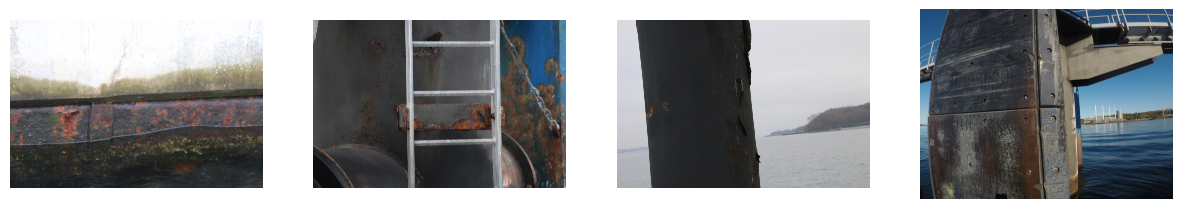


Random no corrosion images:



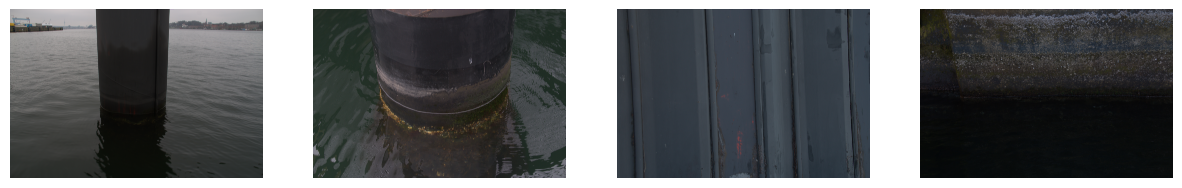

In [4]:
def show_random_images(image_dir, n=4):
    img_paths = list(image_dir.rglob("*.[jp][pn]g"))
    sample_paths = random.sample(img_paths, n)
    # print(sample_paths)
    fig, axs = plt.subplots(1, n, figsize=(15,5))
    for ax, path in zip(axs, sample_paths):
        img = Image.open(path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

print("Random corrosion images:\n")
show_random_images(corrosion_root)
print("\nRandom no corrosion images:\n")
show_random_images(no_corrosion_root)

Generally, these images are darker. This is where image variations and especially higher brightness would help. But we got this final dataset too late in the process, to adjust the training set images accordingly.

## 4. Finding Corrupted, all-white or all-black Images

Is all of the data usable?

In [5]:
dataset_root = Path("/home/shared-data/corrosion_images")

def check_images(image_dir):
    bad_images = []
    full_black = []
    full_white = []
    
    for img_path in image_dir.rglob("*.[jp][pn]g"):  # jpg or png
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)
                
                # is image completely black?
                if img_array.max() == 0:
                    full_black.append(img_path)
                # is image completely white?
                elif img_array.min() == 255:
                    full_white.append(img_path)
        
        # if image cannot be opened
        except Exception as e:
            bad_images.append((img_path, str(e)))  
    
    return bad_images, full_black, full_white

corrupt, black, white = check_images(dataset_root)
print("Corrupted images:", corrupt)
print("Completely black images:", black)
print("Completely white images:", white)

Corrupted images: []
Completely black images: []
Completely white images: []


There are no corrupted images.